# Libraries Used

In [1]:
import requests                     #SCRAPPING 
from bs4 import BeautifulSoup       #SCRAPPING
import pandas as pd                 #READ DATA
import time                         #SCARPPING
import re                           #REGULAR EXPRESIONS
import matplotlib.pyplot as plt     #VISUALIZATION
import seaborn as sns               #VISUALIZATION
import sqlite3                      #DATABASE

#  Data Extraction & Regular Expressions

In [2]:
# Base URL of Open Library search
BASE_URL = "https://openlibrary.org"
SEARCH_URL = "https://openlibrary.org/search?q=subject%3AScience+fiction&mode=ebooks&sort=rating"

session = requests.Session()
# Headers for the HTTP request
session.headers.update({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
})


In [3]:
data = []
page = 1

while len(data) < 500:
    print(f"Scraping page {page}...")
    response = session.get(SEARCH_URL + f"&page={page}")
    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all('li', class_='searchResultItem')

    for book in books:
        if len(data) >= 500:
            break
        try:
            title = book.find('div', class_='resultTitle').text.strip()
            author_raw = book.find('span', class_='bookauthor').text.strip()
            publish_year_raw = book.find('span', class_='resultDetails').text.strip()
            rating_raw = book.find('span', itemprop='ratingValue').text.strip()
            wishlist_raw=book.find('span',itemprop='reviewCount').text.strip()

            editions_raw = book.find('a', string=lambda text: text and 'editions' in text)
            editions_text= editions_raw.get_text(strip=True) if editions_raw else None

            # ----  Regex Processing ----
            #removing "by" word
            author = re.sub(r'^\s*by\s+', '', author_raw, flags=re.IGNORECASE) if author_raw else None
            #removing any strings
            publish_year = re.search(r"\b(18|19|20)\d{2}\b", publish_year_raw).group(0) if publish_year_raw else None
            #removing sympols and keep the rate
            rating = float(re.search(r"\d+(\.\d+)?", rating_raw).group(0)) if rating_raw else None
            #removing string
            wishlist = int(re.search(r"\d+(,\d+)?", wishlist_raw).group(0).replace(',', '')) if wishlist_raw else None
            #removing
            editions=re.search(r'\d+', editions_text).group(0) if editions_text else None


            if title and author and publish_year and rating:
                data.append({
                    'Title': title,
                    'Author': author,
                    'Publish Year': int(publish_year),
                    'Rating': rating,
                    'want o read': wishlist,
                    '# of Editions' : editions
                })
        except Exception as e:
            print(f"Error while parsing book: {e}")
            continue

    page += 1
    time.sleep(0.5)


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Error while parsing book: 'NoneType' object has no attribute 'group'
Scraping page 17...
Error while parsing book: 'NoneType' object has no attribute 'group'
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Error while parsing book: 'NoneType' object has no attribute 'group'
Scraping page 22...
Scraping page 23...
Scraping page 24...
Error while parsing book: 'NoneType' object has no attribute 'text'
Scraping page 25...
Scraping page 26...


# saving extracted data

In [5]:
df = pd.DataFrame(data)
save_path = r"c:\Users\sezar\OneDrive\Desktop\DS_Final_Project\New folder\top_500_novels.xlsx"
# df.to_excel(save_path, index=False)
print(f"Scraping & Cleaning complete. data saved to {save_path}")


Scraping & Cleaning complete. data saved to c:\Users\sezar\OneDrive\Desktop\DS_Final_Project\New folder\top_500_novels.xlsx


# Data exploration

In [6]:
df.head(10)
# df.tail(10)
df.info()
dff=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          500 non-null    object 
 1   Author         500 non-null    object 
 2   Publish Year   500 non-null    int64  
 3   Rating         500 non-null    float64
 4   want o read    500 non-null    int64  
 5   # of Editions  476 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 23.6+ KB


# Data Cleaning, Processing

In [7]:
dff.drop_duplicates(inplace=True)
dff.dropna(axis=0, inplace=True)
dff.dropna(axis=1, inplace=True)
dff["# of Editions"]=dff["# of Editions"].astype(int)
dff.info()
dff.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          476 non-null    object 
 1   Author         476 non-null    object 
 2   Publish Year   476 non-null    int64  
 3   Rating         476 non-null    float64
 4   want o read    476 non-null    int64  
 5   # of Editions  476 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 26.0+ KB


,Title,Author,Publish Year,Rating,want o read,# of Editions
0,The Hitch Hiker's Guide to the Galaxy,Douglas Adams,1979,4.5,1475,120
1,Six of Crows,Leigh Bardugo,2001,4.6,1882,33
2,The Martian,Andy Weir,2011,4.4,689,71
3,Ender's Game,Orson Scott Card,1985,4.3,950,104
4,Watchmen,"Alan Moore, Dave Gibbons, and John Higgins",1987,4.4,392,25
5,Project Hail Mary,Andy Weir,2021,4.4,430,22
6,The two towers,J.R.R. Tolkien,1954,4.4,715,277
7,This Earth of Mankind,Pramoedya Ananta Toer,1972,4.6,812,17
8,The Throne of Fire,Rick Riordan,2011,4.6,289,25
9,Harry Potter and the Prisoner of Azkaban,J. K. Rowling,1999,4.3,3397,260


#   Analysis & Visualization

In [8]:
print("Top novels data analysis report")

print("\nStarting data analysis...") 

# Basic statistics
print("\nBasic statistics:")
print(dff.describe())


Top novels data analysis report

Starting data analysis...

Basic statistics:
       Publish Year      Rating   want o read  # of Editions
count    476.000000  476.000000    476.000000     476.000000
mean    1987.388655    4.180882    407.420168      77.424370
std       33.362731    0.257747   1052.222202     251.786912
min     1818.000000    3.600000      2.000000       2.000000
25%     1977.000000    4.000000     57.000000      12.000000
50%     1997.000000    4.200000    134.500000      25.000000
75%     2010.000000    4.400000    324.500000      54.000000
max     2022.000000    5.000000  15068.000000    3546.000000



Title Length Distribution:
Longest 10 Titles
                                                                                                                                                                                                       Title  Title_Length
Batman: haunted knight : the legends of the Dark Knight Halloween specials : three tales of Halloween in Gotham City / Jeph Loeb & Tim Sale, storytellers ; Gregory Wright, colorist ; Todd Klein, letterer.           204
                                                                                                          Strange case of Dr. Jekyll and Mr. Hyde: with other fables and the misadventures of John Nicholson            98
                                                                                                                  Shatter Me Complete Collection: Shatter Me, Destroy Me, Unravel Me, Fracture Me, Ignite Me            90
                                                                              

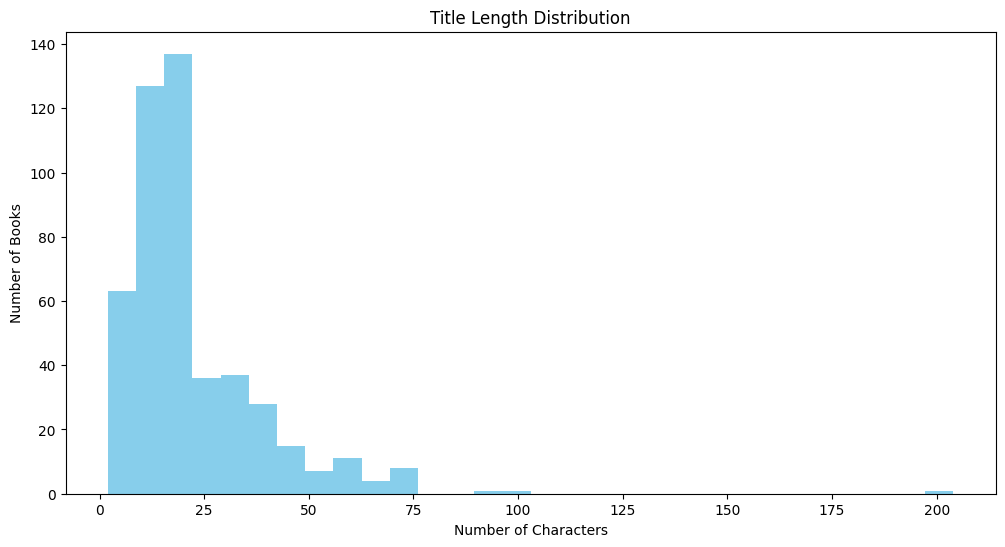

In [9]:
#Title Length Distribution
print("\nTitle Length Distribution:")
dff['Title_Length'] = dff['Title'].str.len()
longest_titles = dff.nlargest(10, 'Title_Length')[['Title', 'Title_Length']]
shortest_titles = dff.nsmallest(10, 'Title_Length')[['Title', 'Title_Length']]

print("Longest 10 Titles") 
print(longest_titles.to_string(index=False))
print("\nShortest 10 Titles")
print(shortest_titles.to_string(index=False))
plt.figure(figsize=(12, 6))
dff['Title_Length'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Title Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Books')
plt.show()


Author Analysis:
Top 10 Authors by Number of Books:
Primary Author
Isaac Asimov         17
Stephen King         15
Terry Pratchett      12
Anne McCaffrey        9
Douglas Adams         8
William Gibson        8
Orson Scott Card      7
Ursula K. Le Guin     7
Brandon Sanderson     7
James S. A. Corey     6
Name: count, dtype: int64


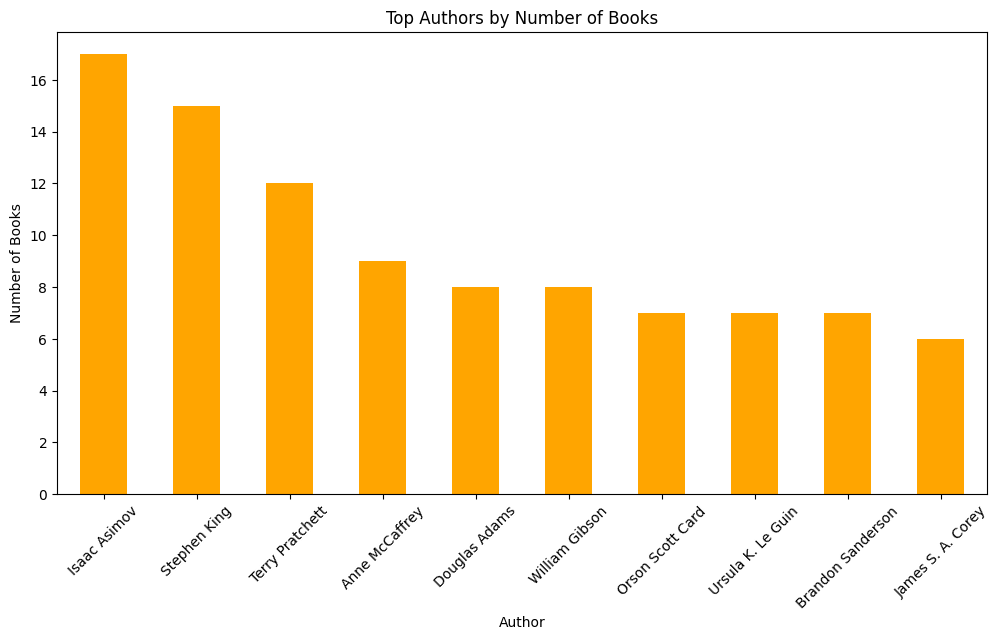

In [10]:
# Author Analysis
print("\nAuthor Analysis:")
dff['Primary Author'] = dff['Author'].str.split(',').str[0]
author_counts = dff['Primary Author'].value_counts().head(10)
print("Top 10 Authors by Number of Books:")
print(author_counts)

plt.figure(figsize=(12, 6))
author_counts.plot(kind='bar', color='orange')
plt.title('Top Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


Publication Year Analysis:
Mean Publication Year: 1987
Median Publication Year: 1997
Publication Year Range: 1818-2022


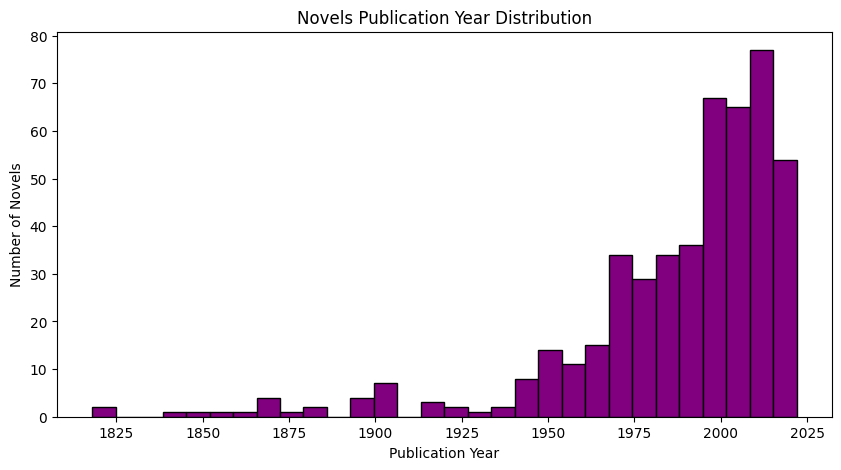

In [11]:
# Publication Year Analysis
print("\nPublication Year Analysis:")
year_stats = dff['Publish Year'].agg(['mean', 'median', 'min', 'max'])
print(f"Mean Publication Year: {year_stats['mean']:.0f}")
print(f"Median Publication Year: {year_stats['median']:.0f}")
print(f"Publication Year Range: {year_stats['min']:.0f}-{year_stats['max']:.0f}")

plt.figure(figsize=(10, 5))
dff['Publish Year'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Novels Publication Year Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Number of Novels')
plt.show()


Publication Year vs Rating Correlation:
Correlation Coefficient: 0.20


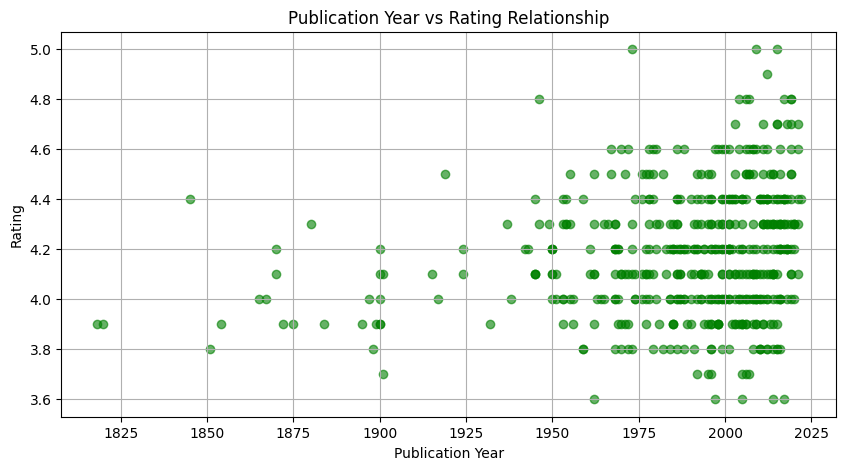

In [12]:
# Publication Year vs Rating Correlation
print("\nPublication Year vs Rating Correlation:")
correlation = dff[['Publish Year', 'Rating']].corr().iloc[0, 1]
print(f"Correlation Coefficient: {correlation:.2f}")

plt.figure(figsize=(10, 5))
plt.scatter(dff['Publish Year'], dff['Rating'], alpha=0.6, color='green')
plt.title('Publication Year vs Rating Relationship')
plt.xlabel('Publication Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


Rating Distribution:
Rating
3.6     5
3.7     7
3.8    28
3.9    50
4.0    73
4.1    65
4.2    70
4.3    56
4.4    53
4.5    27
4.6    24
4.7     7
4.8     7
4.9     1
5.0     3
Name: count, dtype: int64


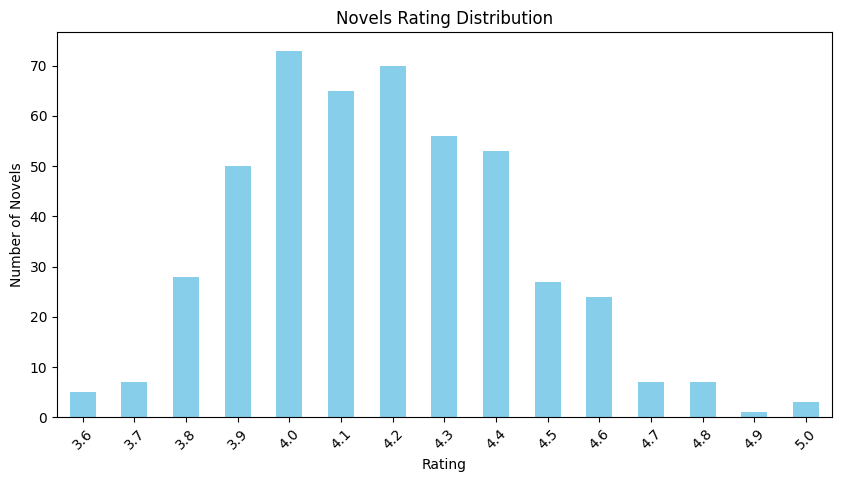

In [13]:
# Rating Distribution
print("\nRating Distribution:")
rating_dist = dff['Rating'].value_counts().sort_index()
print(rating_dist)

plt.figure(figsize=(10, 5))
rating_dist.plot(kind='bar', color='skyblue')
plt.title('Novels Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Novels')
plt.xticks(rotation=45)
plt.show()


Rating by Publication Decade:
Decade
1810    3.900000
1820    3.900000
1840    4.400000
1850    3.850000
1860    4.000000
1870    4.025000
1880    4.100000
1890    3.900000
1900    3.985714
1910    4.200000
1920    4.150000
1930    4.066667
1940    4.277778
1950    4.133333
1960    4.139286
1970    4.204545
1980    4.143750
1990    4.136000
2000    4.197895
2010    4.247273
2020    4.327273
Name: Rating, dtype: float64


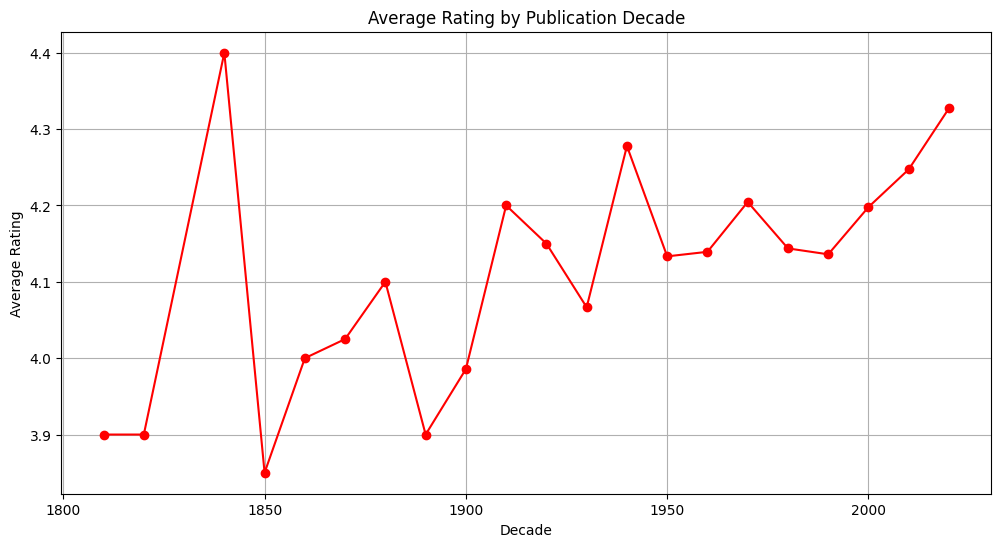

In [14]:
# Rating by Publication Decade
print("\nRating by Publication Decade:")
dff['Decade'] = (dff['Publish Year'] // 10) * 10
decade_ratings = dff.groupby('Decade')['Rating'].mean()
print(decade_ratings)

plt.figure(figsize=(12, 6))
decade_ratings.plot(kind='line', marker='o', color='red')
plt.title('Average Rating by Publication Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


Analysis of 'want o read' (Number of People Who Want to Read):
Number of books with 'want o read' between 0 and 1000: 435


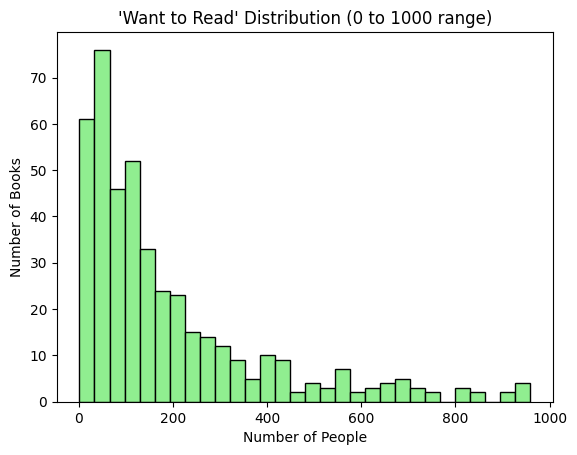

In [15]:
# "want o read" Analysis
print("\nAnalysis of 'want o read' (Number of People Who Want to Read):")
# Check if the column exists
if 'want o read' in dff.columns:
    # Filtering "want o read" between 0 and 1000
    filtered_df_want = dff[(dff['want o read'] >= 0) & (dff['want o read'] <= 1000)]
    print(f"Number of books with 'want o read' between 0 and 1000: {filtered_df_want.shape[0]}")
    
    # Display the distribution of "want o read"
    filtered_df_want['want o read'].plot(kind='hist',bins=30, color='lightgreen', edgecolor='black')
    plt.title("'Want to Read' Distribution (0 to 1000 range)")
    plt.xlabel('Number of People')
    plt.ylabel('Number of Books')
    plt.show()

else:
    print("'want o read' column does not exist in the dataset.")

Number of books with '# of Editions' between 0 and 500: 464

Books with Most Editions (0 to 500 range):
                          Title              Author  # of Editions  Publish Year
                         Walden Henry David Thoreau            486          1854
                     The Hobbit      J.R.R. Tolkien            457          1937
          The war of the worlds         H. G. Wells            437          1898
           Nineteen eighty-four       George Orwell            433          1949
Around the World in Eighty Days         Jules Verne            425          1872


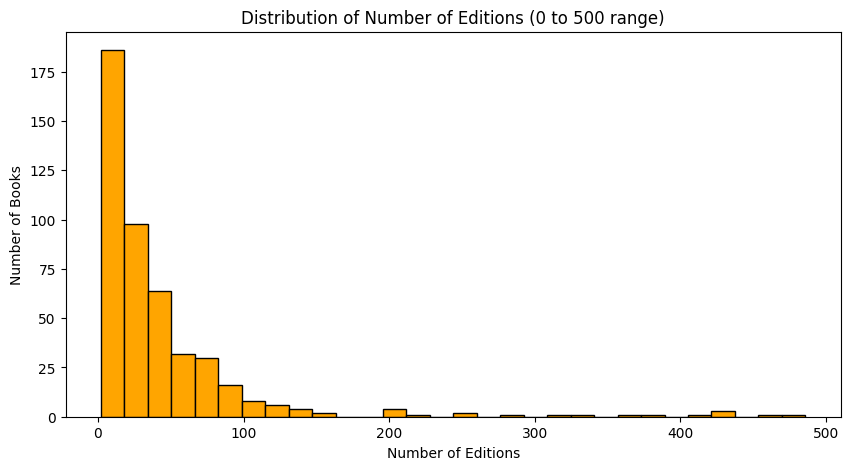


Analysis completed successfully!✅✅


In [16]:
# Filtering books with "# of Editions" between 0 and 500

filtered_df = dff[(dff['# of Editions'] >= 0) & (dff['# of Editions'] <= 500)]
# Displaying the filtered data and analyzing
print(f"Number of books with '# of Editions' between 0 and 500: {filtered_df.shape[0]}")

# Displaying the top 5 books with most editions (within the 0 to 500 range)
most_editions_filtered = filtered_df.nlargest(5, '# of Editions')[['Title', 'Author', '# of Editions', 'Publish Year']]
print("\nBooks with Most Editions (0 to 500 range):")
print(most_editions_filtered.to_string(index=False))

# Displaying the Distribution of # of Editions
plt.figure(figsize=(10, 5))
filtered_df['# of Editions'].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Number of Editions (0 to 500 range)')
plt.xlabel('Number of Editions')
plt.ylabel('Number of Books')
plt.show()

print("\nAnalysis completed successfully!✅✅")

#   DataBase

In [17]:
print("Columns", dff.columns.tolist())  
dfff=dff[['Title','Author','Publish Year','Rating','want o read','# of Editions','Title_Length']]

# Create (or connect to) a SQLite database
conn = sqlite3.connect("novels.db")  

# Save the DataFrame into a table named 'books'
dfff.to_sql("novels", conn, if_exists="replace", index=False)

conn.close()

print("Data stored in SQLite is working✅!")

Columns ['Title', 'Author', 'Publish Year', 'Rating', 'want o read', '# of Editions', 'Title_Length', 'Primary Author', 'Decade']
Data stored in SQLite is working✅!


In [18]:
# Reconnect to the database
conn = sqlite3.connect("novels.db")  
cursor = conn.cursor()  # Create a cursor object to execute SQL queries

# Execute a SQL query to get novels with a rating greater than 4.5
cursor.execute("SELECT * FROM novels WHERE Rating > 4.5")
rows = cursor.fetchall() # Fetch all matching rows from the result
count=1
for row in rows:
    print(f"{count}.{row}")
    count+=1


1.('Six of Crows', 'Leigh Bardugo', 2001, 4.6, 1882, 33, 12)
2.('This Earth of Mankind', 'Pramoedya Ananta Toer', 1972, 4.6, 812, 17, 21)
3.('The Throne of Fire', 'Rick Riordan', 2011, 4.6, 289, 25, 18)
4.('Cryptonomicon', 'Neal Stephenson', 1999, 4.6, 118, 35, 13)
5.('The One: The Selection #3', 'Kiera Cass', 2012, 4.6, 400, 26, 25)
6.('The Last Question', 'Isaac Asimov', 2007, 4.8, 32, 2, 17)
7.('The Dark Forest', '刘慈欣', 2008, 4.6, 169, 25, 15)
8.('Comet in Moominland', 'Tove Jansson', 1946, 4.8, 59, 44, 19)
9.('The Lord of the Rings and The Hobbit set', 'J.R.R. Tolkien', 1979, 4.6, 22, 24, 40)
10.('1984', 'Michael Dean and George Orwell', 2003, 4.7, 385, 4, 4)
11.('Defy Me', 'Tahereh Mafi', 2019, 4.7, 362, 6, 7)
12.('Pimp: [the story of my life]', 'Iceberg Slim, Beck, Robert, and Irvine Welsh', 1967, 4.6, 290, 26, 28)
13.('My Hero Academia, Vol. 2', 'Kohei Horikoshi', 2012, 4.9, 81, 3, 24)
14.('The Toll', 'Neal Shusterman', 2019, 4.6, 65, 3, 8)
15.('Supernova', 'Marissa Meyer', 2019